In [266]:
import pandas as pd
import matplotlib.pyplot as plt 
import os
import seaborn as sns
import numpy as np
from scipy.stats import shapiro
#Visualizar o diretório atual
print(os.getcwd().split("/")[-1])


notebooks


### Dataset escolhido no moodle: dados_banco.csv

In [267]:
df = pd.read_csv("../dataset/dados_banco.csv")
df.head()


,Unnamed: 0,Cliente,Sexo,Idade,Empresa,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente
0,75928,75928,M,32,Privada,5719.00,933.79,0.0,0.0,6023.68,0
1,52921,52921,F,28,Privada,5064.00,628.37,0.0,0.0,1578.24,0
2,8387,8387,F,24,Autônomo,4739.00,889.18,0.0,0.0,2578.70,0
3,54522,54522,M,30,Pública,5215.00,1141.47,0.0,0.0,4348.96,0
4,45397,45397,M,30,Autônomo,5215.56,520.70,0.0,0.0,1516.78,1


In [268]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   Cliente             10000 non-null  int64  
 2   Sexo                10000 non-null  object 
 3   Idade               10000 non-null  int64  
 4   Empresa             10000 non-null  object 
 5   Salario             10000 non-null  float64
 6   Saldo_cc            10000 non-null  float64
 7   Saldo_poupança      10000 non-null  float64
 8   Saldo_investimento  10000 non-null  float64
 9   Devedor_cartao      10000 non-null  float64
 10  Inadimplente        10000 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 859.5+ KB


### Tratamento de linhas nulas e duplicadas

In [269]:
df = df.dropna()
df = df.drop_duplicates()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   Cliente             10000 non-null  int64  
 2   Sexo                10000 non-null  object 
 3   Idade               10000 non-null  int64  
 4   Empresa             10000 non-null  object 
 5   Salario             10000 non-null  float64
 6   Saldo_cc            10000 non-null  float64
 7   Saldo_poupança      10000 non-null  float64
 8   Saldo_investimento  10000 non-null  float64
 9   Devedor_cartao      10000 non-null  float64
 10  Inadimplente        10000 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 859.5+ KB


### Começando análise exploratória dos dados

In [270]:
df = df.select_dtypes(include=['number'])
matriz_correlacao = df.corr()


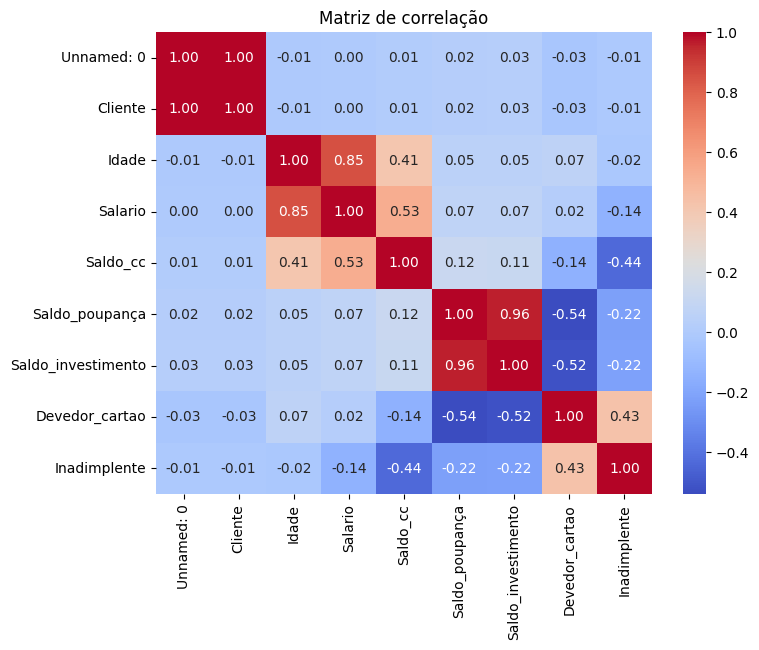

In [271]:
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlação')
plt.show()


### Escolha das variáveis
##### x -> idade
##### y -> Salário

---

##### A) Média, variância, desvio padrão e mediana para x e y

In [272]:
print(f"Média das idades -> {round(df["Idade"].mean(), 0)}")
print(f"Variância das idades -> {round(df["Idade"].var(), 0)}")
print(f"Desvio padrão das Idades -> {round(df["Idade"].std(), 0)} ")
print(f"Mediana das idades -> {round(df["Idade"].median(), 2)}")
print("-" * 100)

print(f"Média dos salários -> {round(df["Salario"].mean(), 2)}")
print(f"Variância dos salários -> {round(df["Salario"].var(), 2)}")
print(f"Desvio padrão dos salários -> {round(df["Salario"].std(), 2)} ")
print(f"Mediana dos salários -> {df["Salario"].median()}")


Média das idades -> 32.0
Variância das idades -> 9.0
Desvio padrão das Idades -> 3.0 
Mediana das idades -> 32.0
----------------------------------------------------------------------------------------------------
Média dos salários -> 5482.88
Variância dos salários -> 155062.25
Desvio padrão dos salários -> 393.78 
Mediana dos salários -> 5498.78


##### B) O histograma de x e y. 

Histograma da Idade(X):

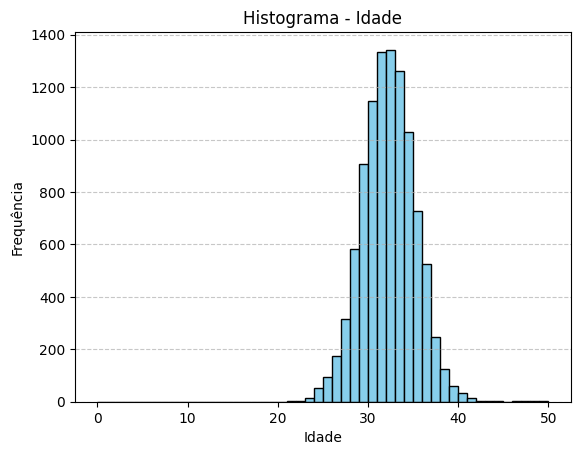

In [273]:
bins = np.arange(0, df["Idade"].max() + 1, 1)  # intervalos de 1 em 1 anos

plt.hist(df["Idade"], bins=bins, color='skyblue', edgecolor='black')
plt.title('Histograma - Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Histograma dos Salários(Y):

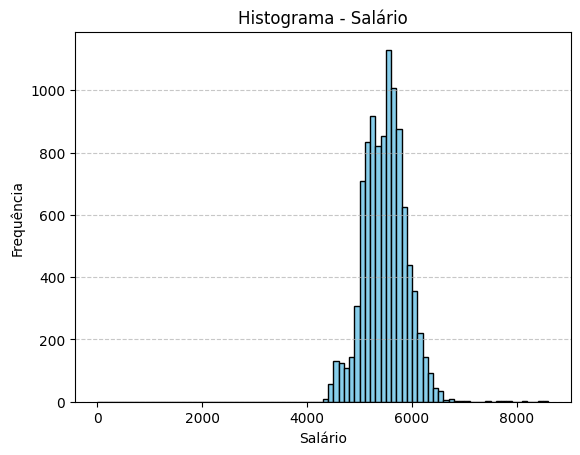

In [274]:
bins = np.arange(0, df["Salario"].max()+ 100, 100)

plt.hist(df["Salario"], bins=bins, color='skyblue', edgecolor='black')
plt.title('Histograma - Salário')
plt.xlabel('Salário')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### C) O boxplot de x e y. 

Boxplot da Idade(X):

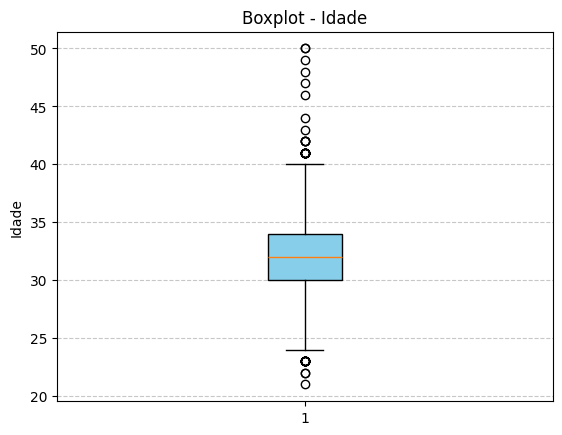

In [275]:
plt.boxplot(df["Idade"], vert=True, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title("Boxplot - Idade")
plt.ylabel("Idade")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Boxplot do Salário(Y):

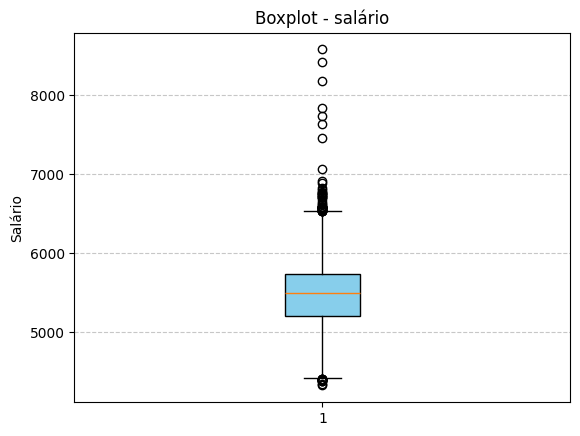

In [276]:
plt.boxplot(df["Salario"], vert=True, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title("Boxplot - salário")
plt.ylabel("Salário")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### D) O coeficiente de correlação de x e y. 

In [277]:
correlacao_x_y = df["Idade"].corr(df["Salario"])
print(f"Coeficiente de correlação: {round(correlacao_x_y, 4)}")


Coeficiente de correlação: 0.8507


##### E) Fazer o teste de normalidade para  y e x. 

In [278]:

data = df.to_numpy()
x = data[:,4]
stat, p = shapiro(x)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Amostra Idade é Gaussiana (aceita H0)')
else:
    print(f'Amostra Idade não é Gausssiana (rejeita H0)')


Statistics=0.998, p=0.000
Amostra Idade não é Gausssiana (rejeita H0)


/home/wallace/FEI/5_semestre/probabilidade_e_estatistica/projeto/projeto_probabilidade_e_estatistica/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


In [279]:
from scipy.stats import shapiro
# Analisar se a coluna sepal.length tem distribuição normal

data = df.to_numpy()
x = data[:,6]
stat, p = shapiro(x)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Amostra Salário é Gaussiana (aceita H0)')
else:
    print(f'Amostra Salário não é Gausssiana (rejeita H0)')


Statistics=0.423, p=0.000
Amostra Salário não é Gausssiana (rejeita H0)


##### F) Fazer o gráfico de densidade junto com o histograma para as variáveis x e y. 

Grafico de densidade junto com histograma da Idade(X):

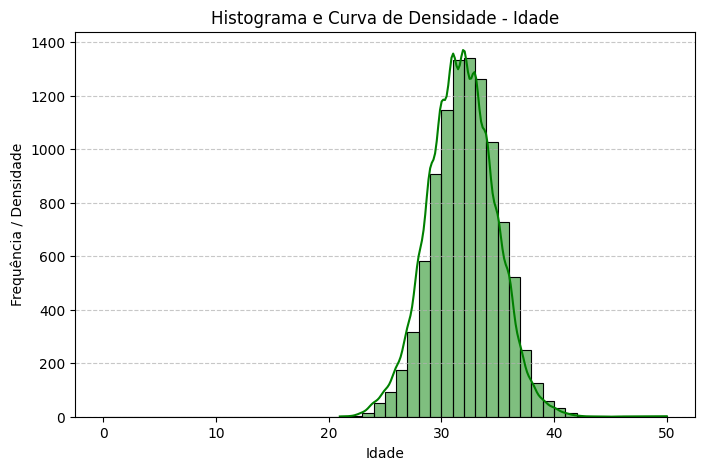

In [280]:
bins = np.arange(0, df["Idade"].max() + 1, 1) 

plt.figure(figsize=(8, 5))
sns.histplot(df["Idade"], bins=bins, kde=True, color='green', edgecolor='black')
plt.title("Histograma e Curva de Densidade - Idade")
plt.xlabel("Idade")
plt.ylabel("Frequência / Densidade")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Grafico de densidade junto com histograma do Salário(Y):

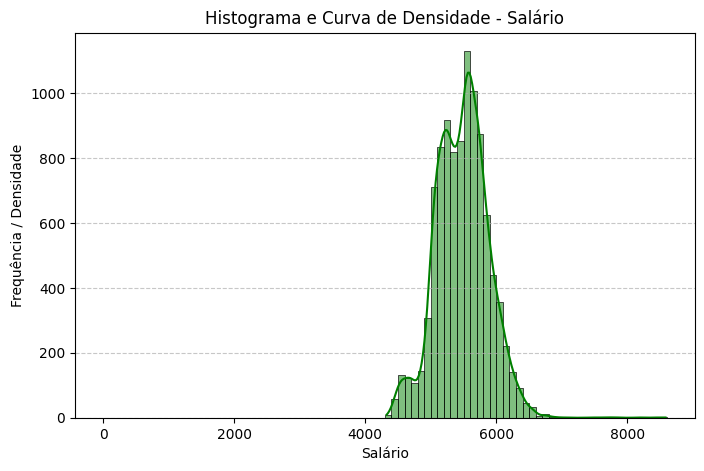

In [281]:
bins = np.arange(0, df["Salario"].max()+ 100, 100)

plt.figure(figsize=(8, 5))
sns.histplot(df["Salario"], bins=bins, kde=True, color='green', edgecolor='black')
plt.title("Histograma e Curva de Densidade - Salário")
plt.xlabel("Salário")
plt.ylabel("Frequência / Densidade")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### Limpando df para fazer correlação linear

In [282]:
# Removendo outliers - Idade
Q1 = df['Idade'].quantile(0.25)
Q3 = df['Idade'].quantile(0.75)

# Calcular o IQR
IQR = Q3 - Q1

# Definir os limites inferior e superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df['Idade'] < limite_inferior) | (df['Idade'] > limite_superior)]
df_no_outliers = df[(df['Idade'] >= limite_inferior) & (df['Idade'] <= limite_superior)]

df_no_outliers.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9958 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          9958 non-null   int64  
 1   Cliente             9958 non-null   int64  
 2   Idade               9958 non-null   int64  
 3   Salario             9958 non-null   float64
 4   Saldo_cc            9958 non-null   float64
 5   Saldo_poupança      9958 non-null   float64
 6   Saldo_investimento  9958 non-null   float64
 7   Devedor_cartao      9958 non-null   float64
 8   Inadimplente        9958 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 778.0 KB


In [283]:
# Removendo outliers - Salario
Q1 = df['Salario'].quantile(0.25)
Q3 = df['Salario'].quantile(0.75)

# Calcular o IQR
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_no_outliers = df[(df['Salario'] >= limite_inferior) & (df['Salario'] <= limite_superior)]

df_no_outliers.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9942 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          9942 non-null   int64  
 1   Cliente             9942 non-null   int64  
 2   Idade               9942 non-null   int64  
 3   Salario             9942 non-null   float64
 4   Saldo_cc            9942 non-null   float64
 5   Saldo_poupança      9942 non-null   float64
 6   Saldo_investimento  9942 non-null   float64
 7   Devedor_cartao      9942 non-null   float64
 8   Inadimplente        9942 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 776.7 KB


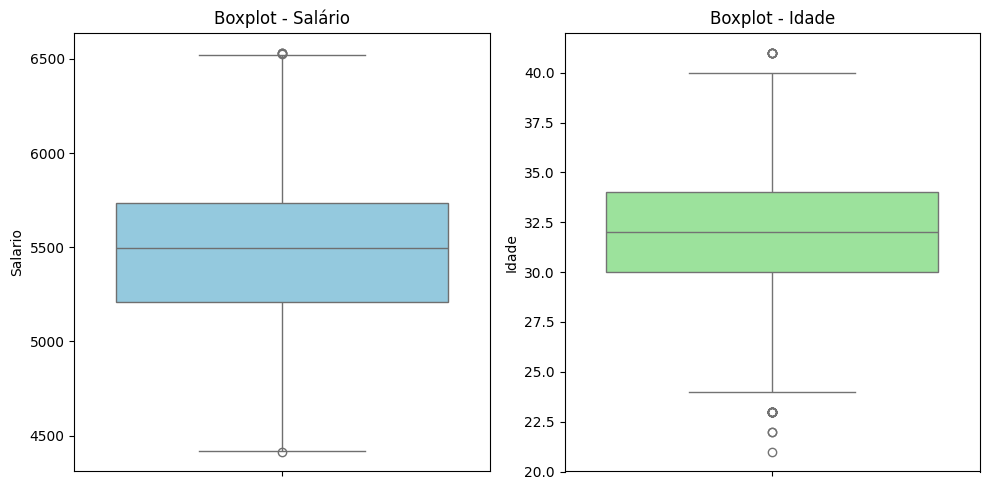

In [284]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(y=df_no_outliers["Salario"], color="skyblue", ax=axes[0])
sns.boxplot(y=df_no_outliers["Idade"], color="lightgreen", ax=axes[1])
axes[0].set_title("Boxplot - Salário")
axes[1].set_title("Boxplot - Idade")
plt.tight_layout()
plt.show()


In [285]:
### Salvando csv
df_no_outliers.to_csv("../dataset/regressao_simples.csv", columns=["Idade", "Salario"])
